<a href="https://colab.research.google.com/github/chaiminwoo0223/Deep-Learning/blob/main/07%20-%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# MNIST 데이터

## 1.데이터 다운로드

In [2]:
train_dataset = datasets.MNIST("../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 241547920.92it/s]


Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 35955979.17it/s]


Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 70172200.54it/s]

Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 20223491.26it/s]


Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw



## 2.Size

In [3]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
image, label = train_dataset.__getitem__(0)
print(image.size(), label)

torch.Size([1, 28, 28]) 5


In [5]:
image, label = train_dataset[0]
print(image.size(), label)

torch.Size([1, 28, 28]) 5


## 3.Length

In [6]:
print(train_dataset.__len__())

60000


In [7]:
len(train_dataset)

60000

## 4.Show

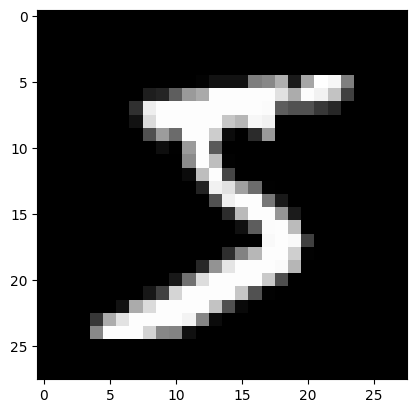

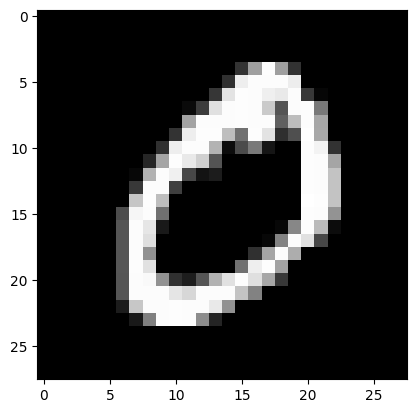

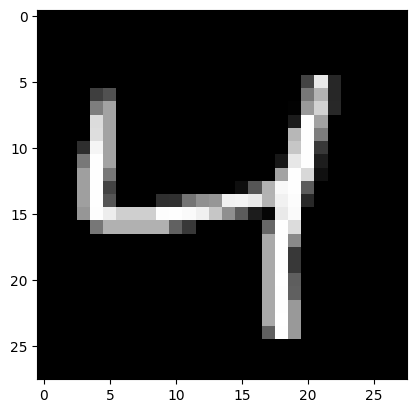

In [8]:
for i in range(3):
    img = train_dataset[i][0].numpy()
    plt.imshow(img[0], cmap='gray')
    plt.show()

# Convolutional Layer

## 1.Channels

In [9]:
image,label = train_dataset[0]
# nn.Conv2d연산을 적용할 수 있도록, 이미지 데이터의 형태를 변환
image = image.view(-1, image.size()[0], image.size()[1], image.size()[2])
image.size()

torch.Size([1, 1, 28, 28])

In [10]:
# 1개의 채널을 받아서, 3개의 채널이 나오는 컨볼루션 연산을 정의
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)
# 입력 이미지
output = conv_layer(image)
print(output.size())

torch.Size([1, 3, 26, 26])


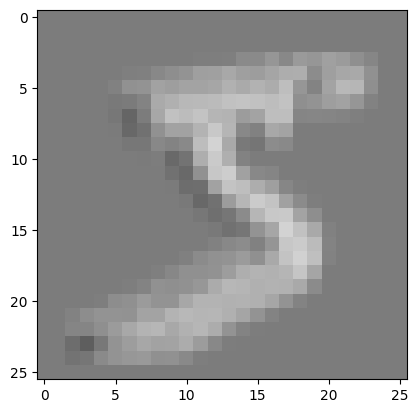

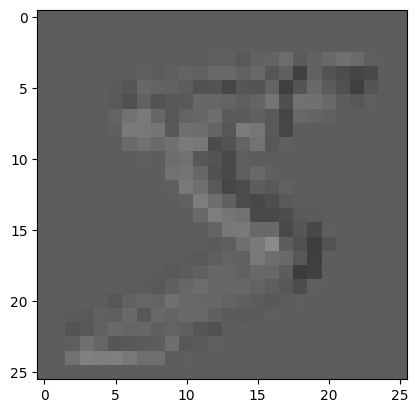

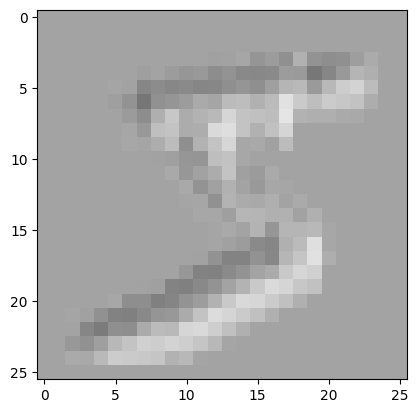

In [11]:
for i in range(output.size()[1]):
    plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray', vmin=-1, vmax=1)
    plt.show()

## 2.Kernel Size
- 커널의 크기가 어떤 역할을 하는가?

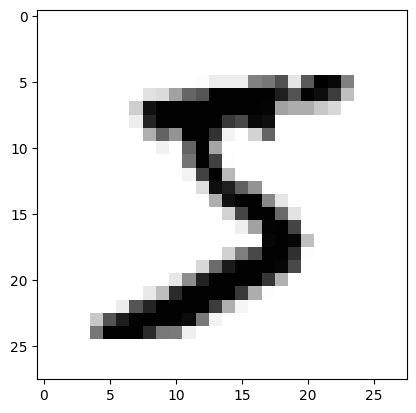

커널 사이즈가 1인 경우 결과값의 크기 : torch.Size([1, 1, 28, 28])


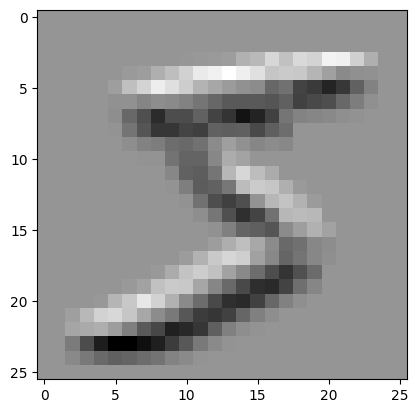

커널 사이즈가 3인 경우 결과값의 크기 : torch.Size([1, 1, 26, 26])


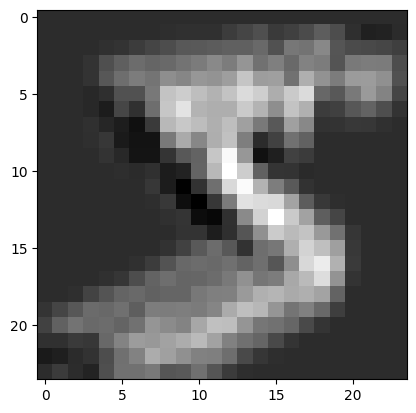

커널 사이즈가 5인 경우 결과값의 크기 : torch.Size([1, 1, 24, 24])


In [12]:
# 커널 사이즈 = 1
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap='gray')
plt.show()
print("커널 사이즈가 1인 경우 결과값의 크기 : {}".format(output.size()))
# 커널 사이즈 = 3
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap='gray')
plt.show()
print("커널 사이즈가 3인 경우 결과값의 크기 : {}".format(output.size()))
# 커널 사이즈 = 5
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=5)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap='gray')
plt.show()
print("커널 사이즈가 5인 경우 결과값의 크기 : {}".format(output.size()))

## 3.Stride
- 스트라이드가 어떤 역할을 하는가?

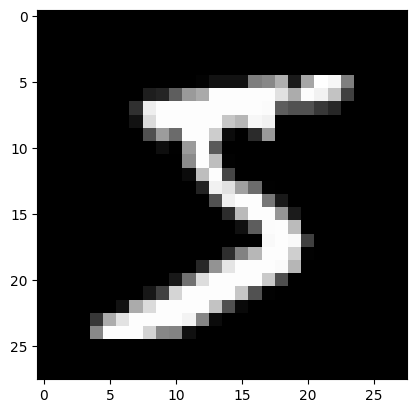

스트라이드가 1인 경우 결과값의 크기 : torch.Size([1, 1, 28, 28])


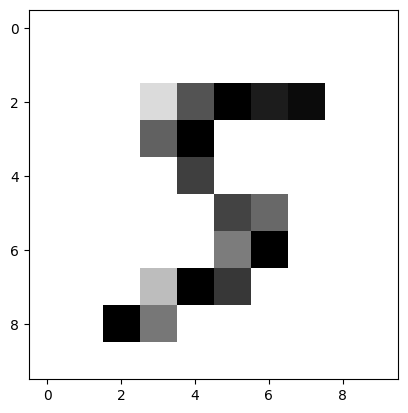

스트라이드가 3인 경우 결과값의 크기 : torch.Size([1, 1, 10, 10])


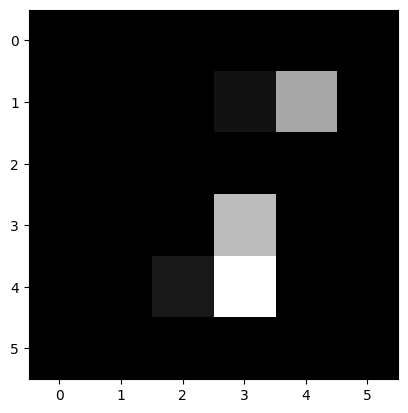

스트라이드가 5인 경우 결과값의 크기 : torch.Size([1, 1, 6, 6])


In [13]:
# 스트라이드 = 1
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1, stride=1)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap='gray')
plt.show()
print("스트라이드가 1인 경우 결과값의 크기 : {}".format(output.size()))
# 스트라이드 = 3
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1, stride=3)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap='gray')
plt.show()
print("스트라이드가 3인 경우 결과값의 크기 : {}".format(output.size()))
# 스트라이드 = 5
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1, stride=5)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap='gray')
plt.show()
print("스트라이드가 5인 경우 결과값의 크기 : {}".format(output.size()))

## 4.Padding
- 패딩이 어떤 역할을 하는가?

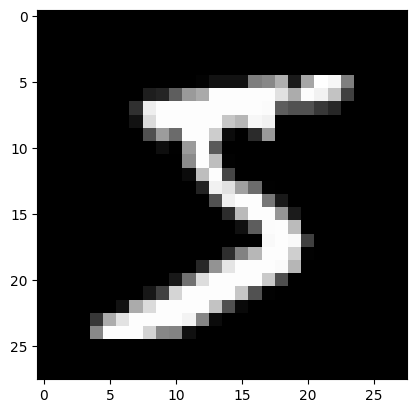

패딩이 0인 경우 결과값의 크기 : torch.Size([1, 1, 28, 28])


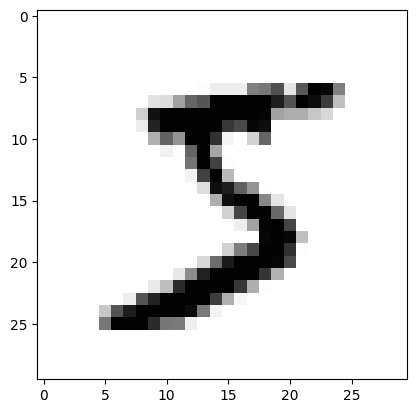

패딩이 1인 경우 결과값의 크기 : torch.Size([1, 1, 30, 30])


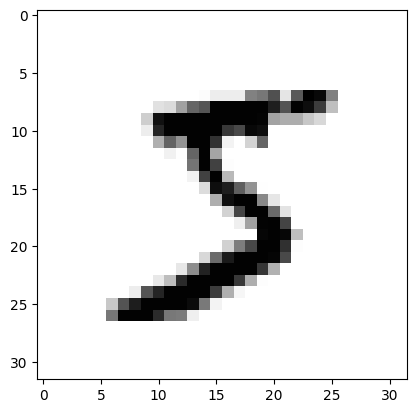

패딩이 2인 경우 결과값의 크기 : torch.Size([1, 1, 32, 32])


In [14]:
# 패딩 = 0
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1, padding=0)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap='gray')
plt.show()
print("패딩이 0인 경우 결과값의 크기 : {}".format(output.size()))
# 패딩 = 1
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1, padding=1)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap='gray')
plt.show()
print("패딩이 1인 경우 결과값의 크기 : {}".format(output.size()))
# 패딩 = 2
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1, padding=2)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap='gray')
plt.show()
print("패딩이 2인 경우 결과값의 크기 : {}".format(output.size()))